<a href="https://colab.research.google.com/github/SJones339/XGBoost-and-ANN/blob/main/IMPXGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install GEOparse

import GEOparse
import pandas as pd

# Download and parse the GEO dataset
gse = GEOparse.get_GEO(geo="GSE46699", destdir="./")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.5/278.5 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for GEOparse: filename=GEOparse-2.0.3-py3-none-any.whl size=29046 sha256=33300149216b4aed06409ec658412a1747307a22ce5966c89d4844b2949fff9f
  Stored in directory: /root/.cache/pip/wheels/14/96/7a/2ccb3a2a9e6f57b1c758b4ced8445fad36bba011bcebb2775f
Successfully built GEOparse


06-Mar-2024 21:51:34 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
06-Mar-2024 21:51:34 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE46nnn/GSE46699/soft/GSE46699_family.soft.gz to ./GSE46699_family.soft.gz
INFO:GEOparse:Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE46nnn/GSE46699/soft/GSE46699_family.soft.gz to ./GSE46699_family.soft.gz
100%|██████████| 69.4M/69.4M [00:02<00:00, 33.7MB/s]
06-Mar-2024 21:51:37 DEBUG downloader - Size validation passed
DEBUG:GEOparse:Size validation passed
06-Mar-2024 21:51:37 DEBUG downloader - Moving /tmp/tmpp3lhr4hc to /content/GSE46699_family.soft.gz
DEBUG:GEOparse:Moving /tmp/tmpp3lhr4hc to /content/GSE46699_family.soft.gz
06-Mar-2024 21:51:37 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE46nnn/GSE46699/soft/GSE46699_family.soft.gz
DEBUG:GEOparse:Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE46nnn/GSE46

In [50]:
import GEOparse
import pandas as pd

# Download the dataset
gse = GEOparse.get_GEO(geo="GSE46699", destdir="./")

# Create separate lists for the identifiers
tissue_list = []
smoking_list = []
obesity_list = []

#Appending each value to the corresponding list. Tissue (tumor = 1, normal = 0). Smoking (Smoker = 1, non-smoker = 0). Obesity (obese = 1, not obese = 0)
for gsm_name, gsm in gse.gsms.items():
    for key, value in gsm.metadata.items():
        if key == 'characteristics_ch1':

            tissue_list.append(1 if 'tumor' in value[1] else 0)

            smoking_list.append(1 if 'yes' in value[2] else 0)

            obesity_list.append(1 if 'yes' in value[3] else 0)

# Create an empty DataFrame to store the merged gene expression data
merged_table = pd.DataFrame()

# Iterate through each GSM entry and concatenate its gene expression data to the merged DataFrame
for gsm_name, gsm in gse.gsms.items():
    # Extract gene expression data from the current GSM entry
    gsm_data = gsm.table["VALUE"]

    # Add gene expression data to the merged DataFrame, using the GSM name as the column name
    merged_table[gsm_name] = gsm_data



07-Mar-2024 01:00:41 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
07-Mar-2024 01:00:41 INFO GEOparse - File already exist: using local version.
INFO:GEOparse:File already exist: using local version.
07-Mar-2024 01:00:41 INFO GEOparse - Parsing ./GSE46699_family.soft.gz: 
INFO:GEOparse:Parsing ./GSE46699_family.soft.gz: 
07-Mar-2024 01:00:41 DEBUG GEOparse - DATABASE: GeoMiame
DEBUG:GEOparse:DATABASE: GeoMiame
07-Mar-2024 01:00:41 DEBUG GEOparse - SERIES: GSE46699
DEBUG:GEOparse:SERIES: GSE46699
07-Mar-2024 01:00:41 DEBUG GEOparse - PLATFORM: GPL570
DEBUG:GEOparse:PLATFORM: GPL570
/usr/local/lib/python3.10/dist-packages/GEOparse/GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
07-Mar-2024 01:00:44 DEBUG GEOparse - SAMPLE: GSM1134764
DEBUG:GEOparse:SAMPLE: GSM1134764
07-Mar-2024 01:00:44 DEBUG GEOpars

In [51]:
# Transpose the merged DataFrame to have samples as rows and genes as columns
merged_table = merged_table.T

# Reset index to ensure proper alignment
merged_table.reset_index(drop=True, inplace=True)


# Create metadata DataFrame
metadata_df = pd.DataFrame({
    'Tissue': tissue_list,
    'Smoking': smoking_list,
    'Obesity': obesity_list
})


# Convert categorical labels to numerical values
metadata_df['Tissue'] = metadata_df['Tissue'].astype(int)
metadata_df['Smoking'] = metadata_df['Smoking'].astype(int)
metadata_df['Obesity'] = metadata_df['Obesity'].astype(int)


# Display DataFrames
print("Gene Expression DataFrame:")
print(merged_table.head())

print("\nMetadata DataFrame:")
print(metadata_df.head())

Gene Expression DataFrame:
       0         1         2          3         4         5         6      \
0  10.654552  5.104113  5.372776  11.908765  3.500414  7.154525  5.504916   
1   9.812106  5.776783  6.422235  11.142645  3.524682  7.052937  5.107343   
2   9.919435  4.628159  5.636217  11.073223  3.479632  7.034347  5.515835   
3  10.735899  6.154403  6.539063  10.490871  3.499183  7.313254  5.442788   
4  10.106417  4.827499  5.668851  11.194256  3.476190  7.254072  5.384006   

      7         8         9      ...      54665      54666      54667  \
0  4.566332  3.965394  3.626812  ...  12.976318  12.576612  14.005180   
1  3.979149  4.313247  3.709840  ...  12.970404  12.676054  14.025714   
2  4.058720  4.498216  3.611606  ...  13.120821  12.666887  13.972896   
3  4.055170  7.589755  3.683939  ...  12.482544  12.094553  13.794694   
4  4.089374  4.762130  3.661195  ...  13.353682  12.934197  14.044545   

       54668     54669     54670     54671      54672      54673      5

In [ ]:
print(merged_table.shape)
print(len(tissue_list))
tissue_list


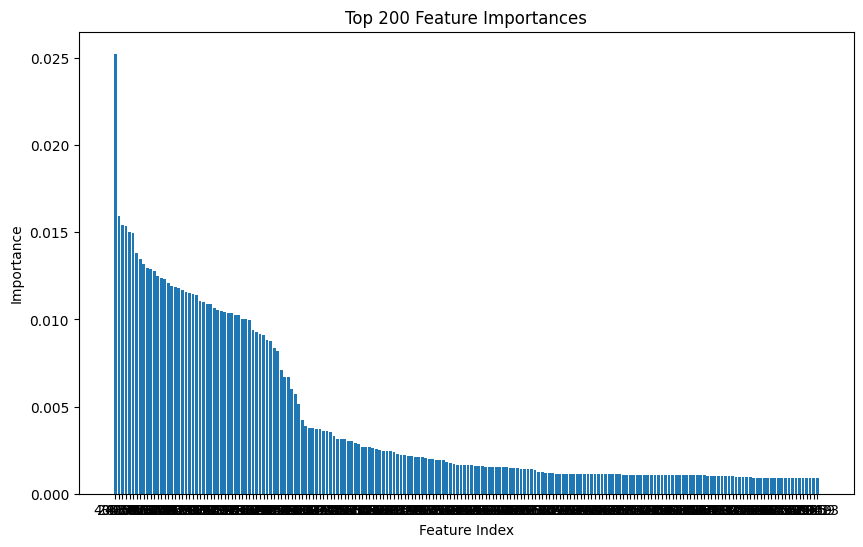

Shape of final merged table: (130, 200)
      40404     28172     36367     40076     16460      15472      15500  \
0  6.878168  4.652657  6.252222  7.862779  7.572011   3.970563  11.922966   
1  4.874247  7.935132  8.618960  5.669411  3.383691  11.320298   4.326168   
2  7.311109  4.304215  6.322231  6.737312  4.635423   4.080987  11.627946   
3  4.765567  8.124928  9.694460  5.801024  3.354015  10.906782   4.084709   
4  7.317699  4.224966  5.721246  6.703879  4.849850   4.198119  10.550046   

       27052     38627     45895  ...     1463      11973     25589     27856  \
0   7.238224  4.781995  6.185982  ...  3.694934  9.101913  3.108667  8.545061   
1   9.032326  7.500251  3.094567  ...  3.923419  6.485462  3.193134  9.306009   
2   7.985778  5.008416  9.085513  ...  3.936803  8.235438  3.310767  8.731076   
3  10.635306  6.651618  3.122335  ...  3.827648  7.295834  3.383279  8.767468   
4   7.519968  5.087323  8.579774  ...  3.895751  7.471736  3.308697  8.586236   

      8992

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Using the trees classifer to select the most important features of the 50000+
clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(merged_table, tissue_list)
importances = clf.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
sorted_idx = importances.argsort()[::-1][:200]  # Select and plot the top 200 features
plt.bar(range(len(sorted_idx)), importances[sorted_idx])
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Top 200 Feature Importances')
plt.xticks(range(len(sorted_idx)), sorted_idx)
plt.show()

# Select top 200 most important features to be part of a new merged_table that will be used in analysis
top_features_idx = importances.argsort()[::-1][:200]
final_merged_table = merged_table.iloc[:, top_features_idx]



# Display this final merged table of the most important features
print("Shape of final merged table:", final_merged_table.shape)
print(final_merged_table.head())


Where red represents cancerous nodes and green represents normal nodes


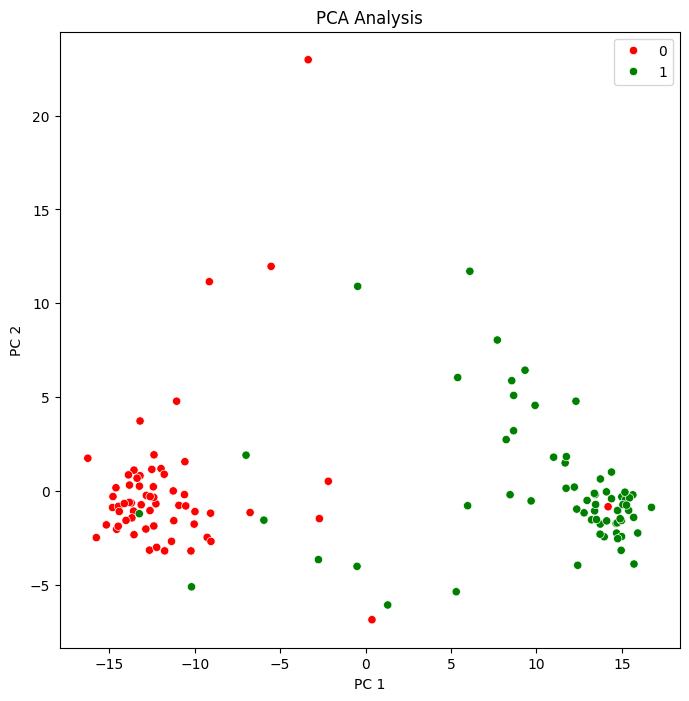

,40404,28172,36367,40076,16460,15472,15500,27052,38627,45895,...,27856,8992,10991,42425,40069,41659,13413,Smoking,Obesity,Tissue
0,1.087958,-0.783014,-0.900367,1.940438,3.081855,-0.952209,1.040515,-1.115372,-0.877976,0.022895,...,-0.449432,1.006295,-0.904296,-1.435276,0.436362,-0.896962,0.596998,0.0,0.0,0.0
1,-0.929568,0.913459,0.867846,-1.037646,-0.920091,1.826448,-1.032043,-0.248247,1.783790,-1.096697,...,1.366216,0.882869,0.506023,0.392376,-1.188279,2.283798,-0.955260,0.0,0.0,1.0
2,1.523839,-0.963098,-0.848062,0.412316,0.275941,-0.910461,0.960027,-0.754065,-0.656260,1.072994,...,-0.005595,-0.842618,-0.850507,-0.334784,0.346155,-0.238395,0.303457,1.0,0.0,0.0
3,-1.038985,1.011550,1.671363,-0.858947,-0.948447,1.670113,-1.097918,0.526504,0.952794,-1.086640,...,0.081238,0.801312,-0.779306,-1.253340,0.667954,-0.257290,0.322898,1.0,0.0,1.0
4,1.530473,-1.004056,-1.297064,0.366921,0.480827,-0.866178,0.665955,-0.979200,-0.578993,0.889834,...,-0.351187,-0.761731,-1.367941,-0.589012,1.151342,-0.195872,0.311400,0.0,0.0,0.0


In [53]:
# PCA analysis
pca = PCA(n_components=4)
scores = pca.fit_transform(final_merged_table)

# Plot PCA scores
print("Where red represents cancerous nodes and green represents normal nodes")
plt.figure(figsize=(8, 8))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1], hue=tissue_list, palette={0: 'red', 1: 'green'})
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA Analysis')
plt.legend()
plt.show()

# Use Scalar to normalize values. Add the smoking, obesity, and tissue labels to the dataframe, and convert all to floats.
scaler = StandardScaler()
final_merged_table_scaled = scaler.fit_transform(final_merged_table)
final_merged_table_scaled_df = pd.DataFrame(final_merged_table_scaled, columns=final_merged_table.columns)

final_merged_table_scaled_df['Smoking'] = metadata_df['Smoking']
final_merged_table_scaled_df['Obesity'] = metadata_df['Obesity']
final_merged_table_scaled_df['Tissue'] = metadata_df['Tissue']

final_merged_table_scaled_df[['Smoking', 'Obesity', 'Tissue']] = final_merged_table_scaled_df[['Smoking', 'Obesity', 'Tissue']].astype(float)

final_merged_table_scaled_df.head()

Good separation found. Now we will create the XGBoost Classifer Using some arbitrary values for hyperparameters




In [47]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Define the variables and target column
var_columns = [c for c in final_merged_table_scaled_df.columns if c != 'Tissue']
X = final_merged_table_scaled_df[var_columns]
y = final_merged_table_scaled_df['Tissue']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the parameters for the XGBoost classifier
params = {
    'objective': 'binary:logistic',
    'max_depth': 4,
    'alpha': 10,
    'learning_rate': 1.0,
    'n_estimators': 100
}

# Instantiate the XGBoost classifier
xgb_clf = xgb.XGBClassifier(**params)

eval_set = [(X_train, y_train), (X_valid, y_valid)]

# Fit the classifier to the training data
xgb_clf.fit(X_train, y_train, eval_set=eval_set, eval_metric="auc", verbose=True)

# Predict probabilities for training and validation sets
y_train_pred = xgb_clf.predict_proba(X_train)[:, 1]
y_valid_pred = xgb_clf.predict_proba(X_valid)[:, 1]

# Print AUC scores for training and validation sets
print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(
    roc_auc_score(y_train, y_train_pred),
    roc_auc_score(y_valid, y_valid_pred)
))

# Compute accuracy using cross-validation
accuracies = cross_val_score(estimator=xgb_clf, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))


[0]	validation_0-auc:0.96691	validation_1-auc:0.94841


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-auc:0.98720	validation_1-auc:0.96958
[2]	validation_0-auc:0.98720	validation_1-auc:0.96958
[3]	validation_0-auc:0.98720	validation_1-auc:0.96958
[4]	validation_0-auc:0.98720	validation_1-auc:0.96958
[5]	validation_0-auc:0.98720	validation_1-auc:0.96958
[6]	validation_0-auc:0.98720	validation_1-auc:0.96958
[7]	validation_0-auc:0.98720	validation_1-auc:0.96958
[8]	validation_0-auc:0.98720	validation_1-auc:0.96958
[9]	validation_0-auc:0.98720	validation_1-auc:0.96958
[10]	validation_0-auc:0.98720	validation_1-auc:0.96958
[11]	validation_0-auc:0.98720	validation_1-auc:0.96958
[12]	validation_0-auc:0.98720	validation_1-auc:0.96958
[13]	validation_0-auc:0.98720	validation_1-auc:0.96958
[14]	validation_0-auc:0.98720	validation_1-auc:0.96958
[15]	validation_0-auc:0.98720	validation_1-auc:0.96958
[16]	validation_0-auc:0.98720	validation_1-auc:0.96958
[17]	validation_0-auc:0.98720	validation_1-auc:0.96958
[18]	validation_0-auc:0.98720	validation_1-auc:0.96958
[19]	validation_0-a

Hyperparameter Optimization -- Finding the optimal number of trees (n_estimators, depth, and learning_rate) to obtain best performance. Still has few bugs/issues

In [ ]:
"""
# Define hyperparameters for tuning
params_grid = {
    "learning_rate": [0.02, 0.05, 0.1],
    "max_depth": [2, 3, 5],
    "n_estimators": [1000, 2000, 3000]
}

# Perform hyperparameter tuning using GridSearchCV
model_xgboost_hp = GridSearchCV(estimator=xgb.XGBClassifier(
                                    subsample=0.5,
                                    colsample_bytree=0.25,
                                    eval_metric='auc',
                                    use_label_encoder=False),
                                param_grid=params_grid,
                                cv=2,
                                scoring='roc_auc',
                                return_train_score=True,
                                verbose=4)
model_xgboost_hp.fit(X, y)

# Print the results of hyperparameter tuning
df_cv_results = pd.DataFrame(model_xgboost_hp.cv_results_)
df_cv_results = df_cv_results[['rank_test_score', 'mean_test_score', 'mean_train_score',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
print(df_cv_results)

# Plot the performance with respect to the number of trees and depth
fig, ax = plt.subplots(figsize=(10, 5))
for depth in [2, 3, 5]:
    df_cv_results.loc[df_cv_results['param_max_depth'] == depth].plot(
        x='param_n_estimators', y='mean_test_score', label=f'Depth={depth}', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance with respect to # of Trees and Depth')

# Plot the performance with respect to learning rate
fig, ax = plt.subplots(figsize=(10, 5))
df_cv_results.loc[df_cv_results['param_n_estimators'] == 3000].plot(
    x='param_learning_rate', y='mean_test_score', label='Depth=2, Trees=3000', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance with respect to learning rate')
"""

Plot learning curves of AUC over an increasing number of trees

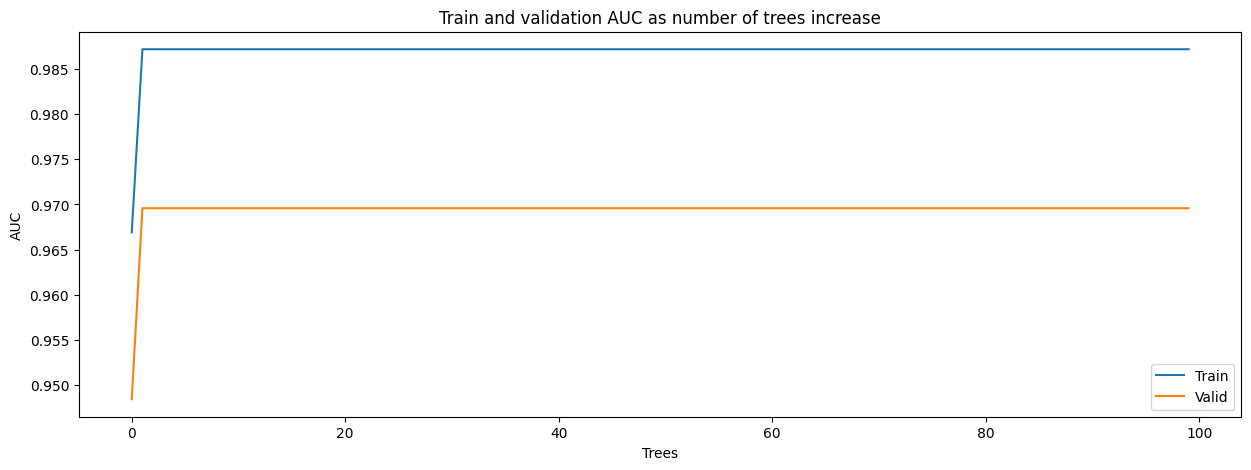

In [48]:
# Plot the learning curve
evaluation_results = xgb_clf.evals_result()
train_auc_tree = evaluation_results['validation_0']['auc']
valid_auc_tree = evaluation_results['validation_1']['auc']
plt.figure(figsize=(15, 5))
plt.plot(train_auc_tree, label='Train')
plt.plot(valid_auc_tree, label='Valid')
plt.title("Train and validation AUC as number of trees increase")
plt.xlabel("Trees")
plt.ylabel("AUC")
plt.legend(loc='lower right')
plt.show()